In [1]:
## compare P(k,z)_DDM^L / P(k,z)_CDM^L 
## for the same parameters as in Jonathan Hubert et al., JCAP10(2021)040, Figure 1
#
# This script has been used most reently with class v3.1.2 after correcting a bug:
# source/input.c line 3010: add
#  Omega_tot += pba->Omega0_dcdmdr;
# This bug is expected to be fixed in the next days in v3.1.3

In [2]:
from classy import Class
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#### Converting the value of Gamma to km/s/Mpc
from astropy import units as u

### Set the value below
gamma_value = 1e6     # in units Gyr**(-1)

### Conversion takes place below
(gamma_value*u.Gyr**(-1)).to(u.km/u.Mpc/u.s)

<Quantity 9.77792222e+08 km / (Mpc s)>

In [4]:
### choose common settings
Omega_m = 0.307
Omega_b = 0.048
A_s=2.43e-9
h = 0.678
n_s = 0.96

# redhsift and maximum k in the plots
z=0
kmax = 20.

# derived parameters
omega_b  = Omega_b*h**2
Omega_dm = Omega_m-Omega_b
omega_dm = Omega_dm*h**2

common_settings={ 
                    'output' : 'mPk',
                    #'non linear' : 'halofit',
                    'P_k_max_h/Mpc' : kmax,
                    'h' : h,
                    'omega_b' : omega_b,
                    'n_s' : n_s,
                    'A_s' : A_s,
                    'z_reio' : 9.9
                }

kk = np.logspace(np.log10(1e-2),np.log10(10),100)

In [5]:
### compute P_LCDM^NL(k,z)
lcdm = Class()
lcdm.set(common_settings)
lcdm.set({'omega_cdm' : omega_dm})
lcdm.compute()
pk_cdm = np.vectorize(lcdm.pk)(kk,z)
#pk_cdm_lin = np.vectorize(lcdm.pk_lin)(kk,z)

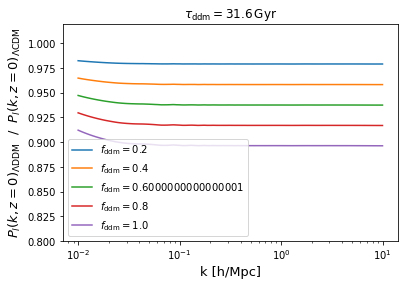

In [6]:
### Get P_DDM^L(k,z) for various f_ddm at z=0 and plot the ratios

# define values of f_ddm
f_list = np.linspace(0.2,1.,5)

tau=31.6
gamma=1/tau # decay rate in 1/Gyr

for f in f_list:
    # compute Pk 
    model = Class()
    model.empty()
    model.set(common_settings)
    model.set({
           'omega_ini_dcdm' : f*omega_dm,
           'omega_cdm' : omega_dm*(1.-f),
           'Gamma_dcdm' : 9.777922e2*gamma # the factor converts gamma from 1/Gyr to km/s/Mpc
          })
    model.compute()
    pk_ddm = np.vectorize(model.pk)(kk,z)
    #h_model = model.h()
        
    # plot ratio
    plt.xscale('log')
    plt.yscale('linear')
    plt.ylim(0.80,1.02)
        
    plt.plot(kk,pk_ddm/pk_cdm,
                label =r'$f_\mathrm{ddm}=$'+'{a}'.format(a=f))
        
    plt.title('one-body decay')
    plt.ylabel(r'$P_l(k,z=0)_{\Lambda\mathrm{DDM}} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
    plt.xlabel(r'k [h/Mpc]', fontsize=13)
    plt.title(r'$\tau_\mathrm{ddm}='+'{a}'.format(a=tau)+'\, \mathrm{Gyr}$')
        
    plt.legend()

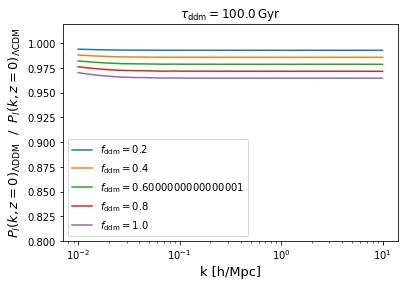

In [7]:
### Get P_DDM^L(k,z) for various f_ddm at z=0 and plot the ratios

# define values of f_ddm
f_list = np.linspace(0.2,1.,5)

tau=100.
gamma=1/tau # decay rate in 1/Gyr

for f in f_list:
    # compute Pk 
    model = Class()
    model.empty()
    model.set(common_settings)
    model.set({
           'omega_ini_dcdm' : f*omega_dm,
           'omega_cdm' : omega_dm*(1.-f),
           'Gamma_dcdm' : 9.777922e2*gamma # the factor converts gamma from 1/Gyr to km/s/Mpc
          })
    model.compute()
    pk_ddm = np.vectorize(model.pk)(kk,z)
    #h_model = model.h()
        
    # plot ratio
    plt.xscale('log')
    plt.yscale('linear')
    plt.ylim(0.80,1.02)
        
    plt.plot(kk,pk_ddm/pk_cdm,
                label =r'$f_\mathrm{ddm}=$'+'{a}'.format(a=f))
        
    plt.title('one-body decay')
    plt.ylabel(r'$P_l(k,z=0)_{\Lambda\mathrm{DDM}} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
    plt.xlabel(r'k [h/Mpc]', fontsize=13)
    plt.title(r'$\tau_\mathrm{ddm}='+'{a}'.format(a=tau)+'\, \mathrm{Gyr}$')
        
    plt.legend()

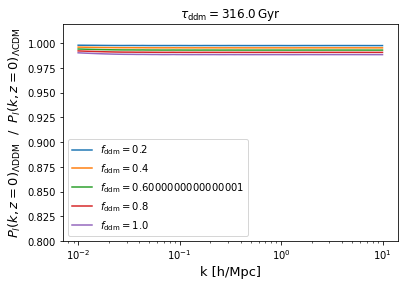

In [10]:
### Get P_DDM^L(k,z) for various f_ddm at z=0 and plot the ratios

# define values of f_ddm
f_list = np.linspace(0.2,1.,5)

tau=316.
gamma=1/tau # decay rate in 1/Gyr

for f in f_list:
    # compute Pk 
    model = Class()
    model.empty()
    model.set(common_settings)
    model.set({
           'omega_ini_dcdm' : f*omega_dm,
           'omega_cdm' : omega_dm*(1.-f),
           'Gamma_dcdm' : 9.777922e2*gamma # the factor converts gamma from 1/Gyr to km/s/Mpc
          })
    model.compute()
    pk_ddm = np.vectorize(model.pk)(kk,z)
    #h_model = model.h()
        
    # plot ratio
    plt.xscale('log')
    plt.yscale('linear')
    plt.ylim(0.80,1.02)
        
    plt.plot(kk,pk_ddm/pk_cdm,
                label =r'$f_\mathrm{ddm}=$'+'{a}'.format(a=f))
        
    plt.title('one-body decay')
    plt.ylabel(r'$P_l(k,z=0)_{\Lambda\mathrm{DDM}} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
    plt.xlabel(r'k [h/Mpc]', fontsize=13)
    plt.title(r'$\tau_\mathrm{ddm}='+'{a}'.format(a=tau)+'\, \mathrm{Gyr}$')
        
    plt.legend()

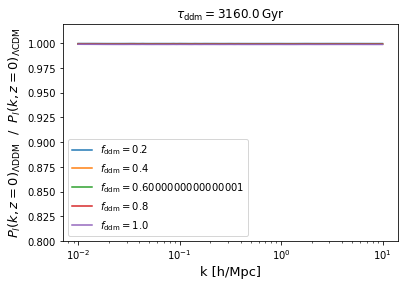

In [9]:
### Get P_DDM^L(k,z) for various f_ddm at z=0 and plot the ratios

# define values of f_ddm
f_list = np.linspace(0.2,1.,5)

tau=3160.
gamma=1/tau # decay rate in 1/Gyr

for f in f_list:
    # compute Pk 
    model = Class()
    model.empty()
    model.set(common_settings)
    model.set({
           'omega_ini_dcdm' : f*omega_dm,
           'omega_cdm' : omega_dm*(1.-f),
           'Gamma_dcdm' : 9.777922e2*gamma # the factor converts gamma from 1/Gyr to km/s/Mpc
          })
    model.compute()
    pk_ddm = np.vectorize(model.pk)(kk,z)
    #h_model = model.h()
        
    # plot ratio
    plt.xscale('log')
    plt.yscale('linear')
    plt.ylim(0.80,1.02)
        
    plt.plot(kk,pk_ddm/pk_cdm,
                label =r'$f_\mathrm{ddm}=$'+'{a}'.format(a=f))
        
    plt.title('one-body decay')
    plt.ylabel(r'$P_l(k,z=0)_{\Lambda\mathrm{DDM}} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
    plt.xlabel(r'k [h/Mpc]', fontsize=13)
    plt.title(r'$\tau_\mathrm{ddm}='+'{a}'.format(a=tau)+'\, \mathrm{Gyr}$')
        
    plt.legend()